In [6]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import json
from copy import deepcopy
import pandas as pd
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../../')
from style import style_setup

os.system('python ../style/style_setup.py')

0

In [145]:
path_to_folders = '/Users/tolmach/Documents/GitHub/latent_circuit_inference/data/inferred_LCs/CDDMtanh'
path_to_RNNs = '/Users/tolmach/Documents/GitHub/rnn_coach/data/trained_RNNs/CDDMtanh'

In [131]:
subfolders = os.listdir(path_to_folders)
subfolders.remove(".DS_Store")

In [132]:
subfolders.remove("0.0111542_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500")

# first check how well the inferred parameters correlated with one another!

0.0116865_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


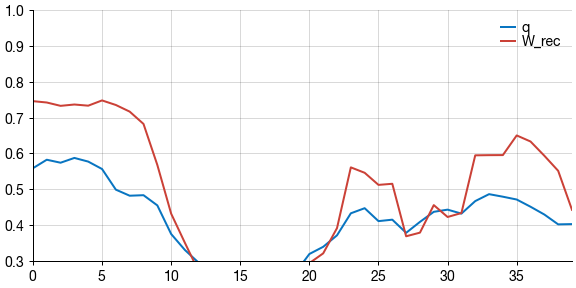

0.0116744_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


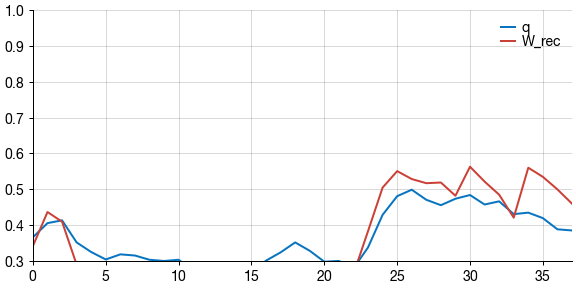

0.0113801_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


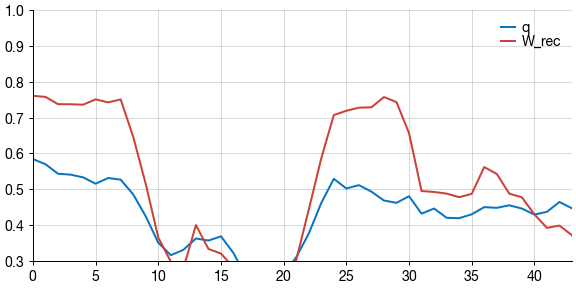

0.0113189_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


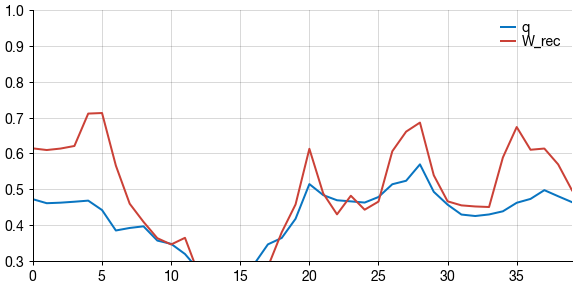

0.0115437_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


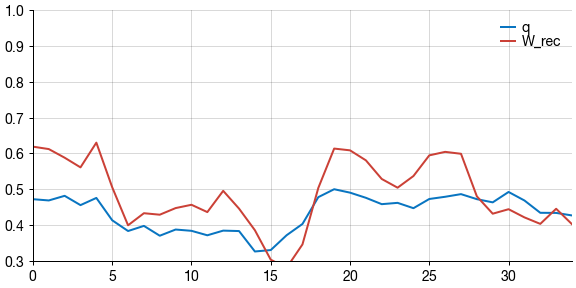

0.0116637_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


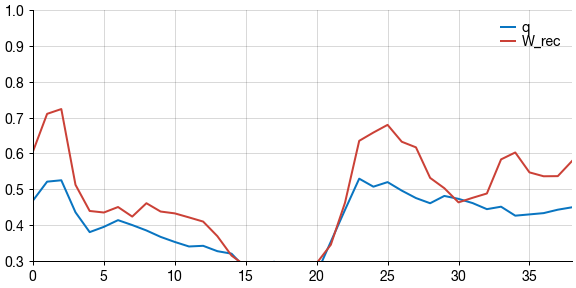

0.0116606_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


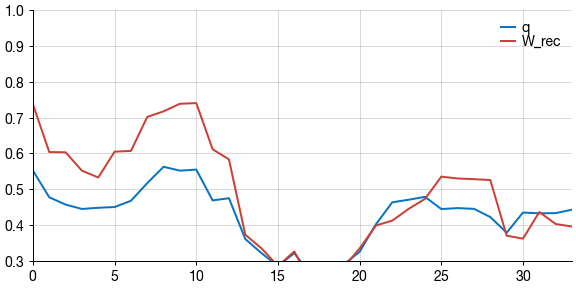

0.0116196_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


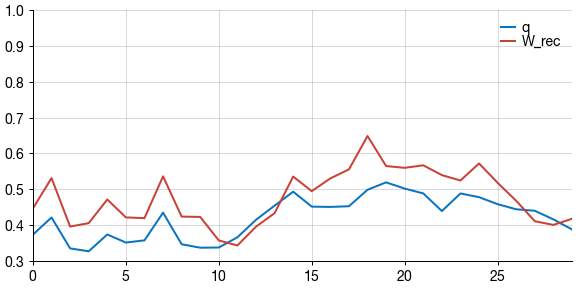

0.0112893_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


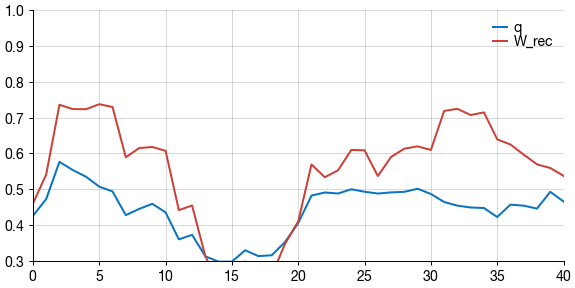

0.0113312_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


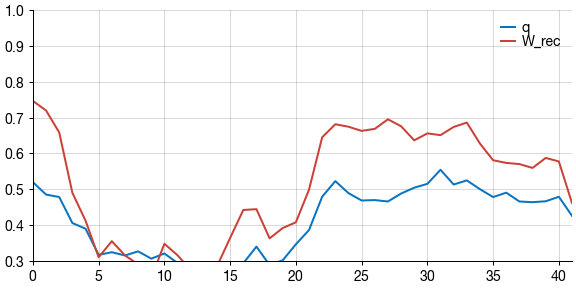

0.0113808_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


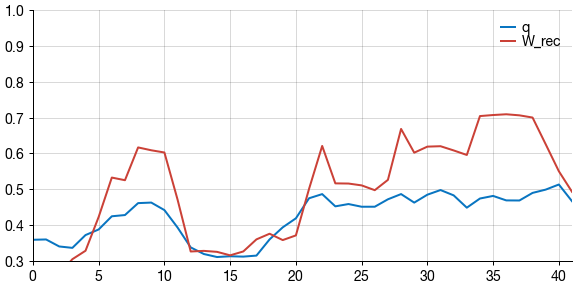

0.0114938_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


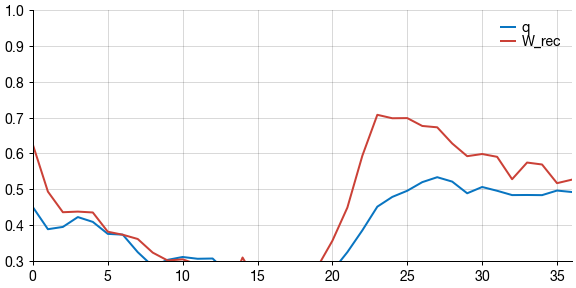

0.0113474_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


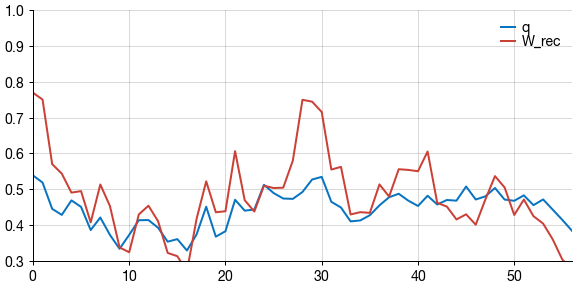

0.011634_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


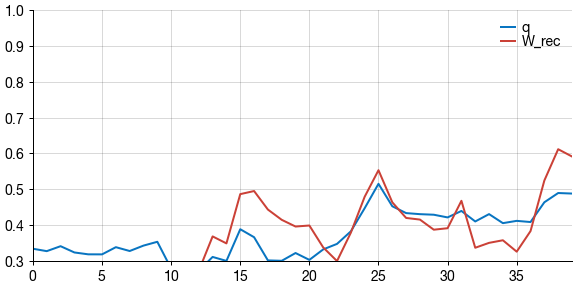

0.0116338_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


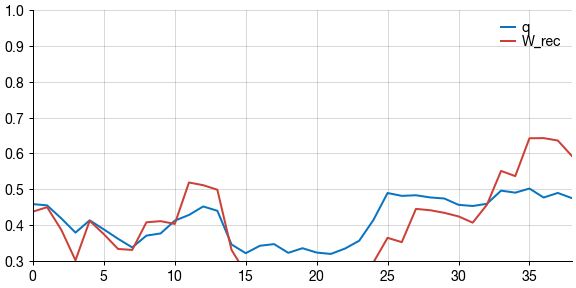

0.0114748_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


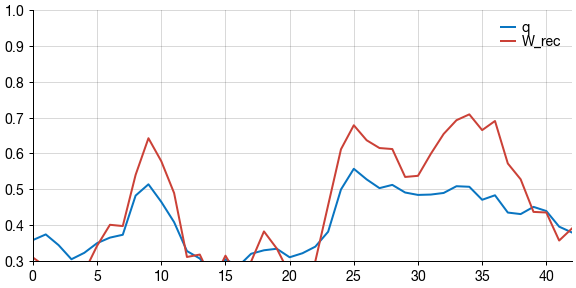

0.0114193_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


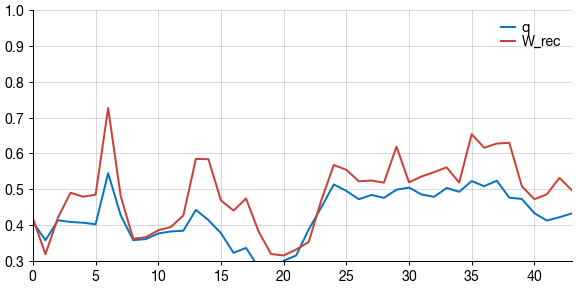

0.0116138_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


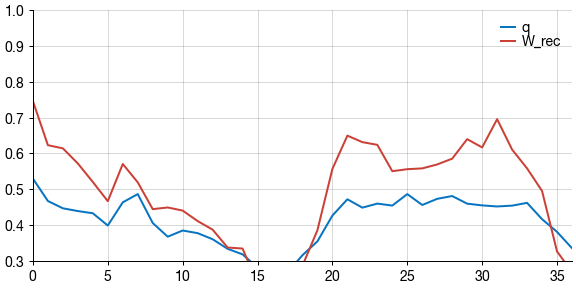

0.0115308_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500


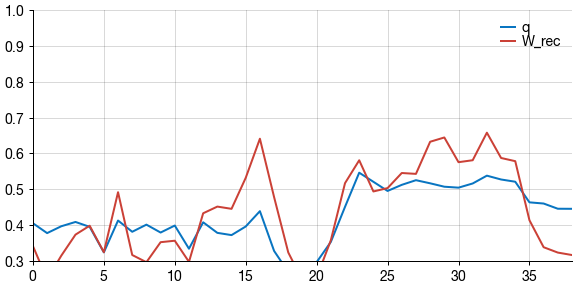

In [134]:
def corr_series(A, width=5):
    res = []
    np.fill_diagonal(A, 0)
    for i in range(A.shape[0]-width):
        res.append(np.mean(A[i:i + width,i:i + width]))
    return np.array(res)

filtered_LC_folders = []
for sf in subfolders:
    path_to_subfolder = os.path.join(path_to_folders, sf)
    LC_folders = os.listdir(path_to_subfolder)
#     print(path_to_subfolder)
    if ".DS_Store" in LC_folders:
        LC_folders.remove(".DS_Store")
    # something wrong with this
    print(sf)
    scores1 = [float(LC_folder.split("_")[0]) for LC_folder in LC_folders]
    scores2 = [float(LC_folder.split("_")[1]) for LC_folder in LC_folders]
    pdf = pd.DataFrame({"R2 total" : scores1, "R2 projection" : scores2, "LC_folder_name" : LC_folders})
    pdf = pdf.sort_values(by=['R2 total'], ascending=False)
    folders_sorted = list(pdf["LC_folder_name"])
    scores1_sorted = list(pdf["R2 total"])
    scores2_sorted = list(pdf["R2 projection"])
    W_inps_sorted = []
    W_recs_sorted = []
    W_outs_sorted = []
    qs_sorted = []
    for i, folder in enumerate(folders_sorted):
        data_file = os.path.join(path_to_subfolder, folder, f"{scores1_sorted[i]}_{scores2_sorted[i]}_LC_params.json")
        data = json.load(open(data_file, "rb+"))
        W_inps_sorted.append(np.array(data["W_inp"]).flatten().reshape(1, -1))
        W_recs_sorted.append(np.array(data["W_rec"]).flatten().reshape(1, -1))
        W_outs_sorted.append(np.array(data["W_out"]).flatten().reshape(1, -1))
        qs_sorted.append(np.array(data["q"]).flatten().reshape(1, -1))
#         print(qs_sorted[-1].shape)
        W_inps_sorted[-1] /= np.linalg.norm(W_inps_sorted[-1])
        W_recs_sorted[-1] /= np.linalg.norm(W_recs_sorted[-1])
        W_outs_sorted[-1] /= np.linalg.norm(W_outs_sorted[-1])
        qs_sorted[-1] /= np.linalg.norm(qs_sorted[-1])
    W_inps_flat = np.vstack(W_inps_sorted)
    W_outs_flat = np.vstack(W_outs_sorted)
    W_recs_flat = np.vstack(W_recs_sorted)
    qs_flat = np.vstack(qs_sorted)
    
    #now plot a bunch of correlations!
    fig, axs = plt.subplots(1, 1, figsize = (4, 2))
    axs.plot(corr_series(qs_flat @ qs_flat.T), label = "q")
    res = corr_series(W_recs_flat @ W_recs_flat.T)
    if res[0]>0.65:
        filtered_LC_folders.append(sf)
    axs.plot(res, label = "W_rec")
    axs.set_ylim([0.3, 1])
    plt.grid(True)
    plt.legend()

    plt.show()

0.0116865_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500
0.9150020473165498 0.943714889276647


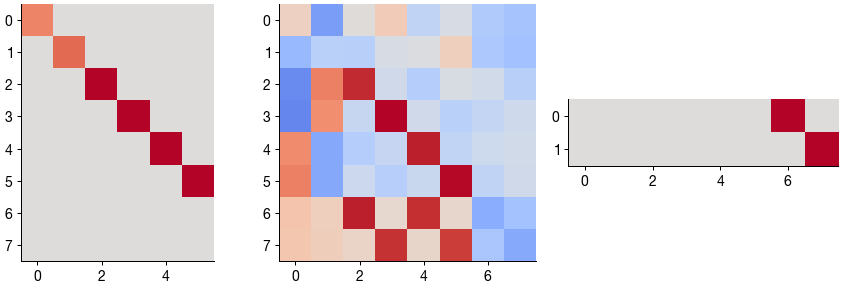

0.0113801_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500
0.9099031204550643 0.9465931390034846


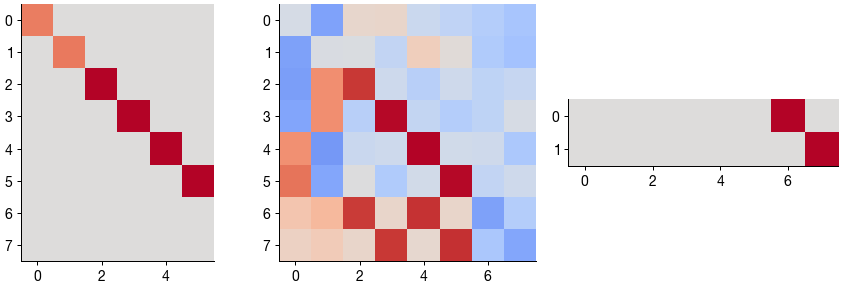

0.0116606_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500
0.8865208277991372 0.9094558139861968


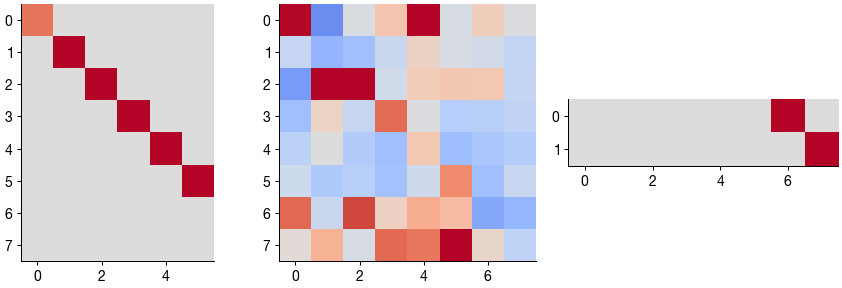

0.0113312_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500
0.9190595151031782 0.9555782691720942


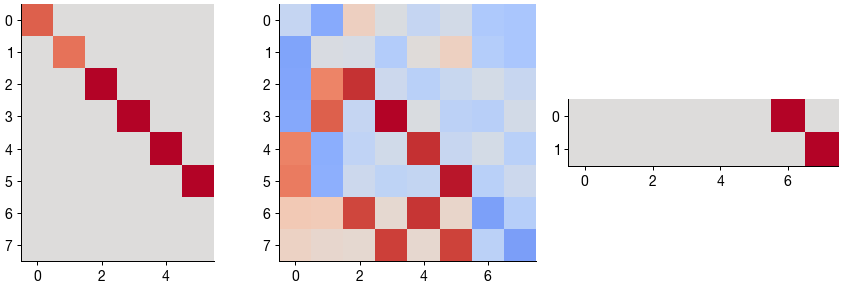

0.0113474_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500
0.9090412958897763 0.9248929675632755


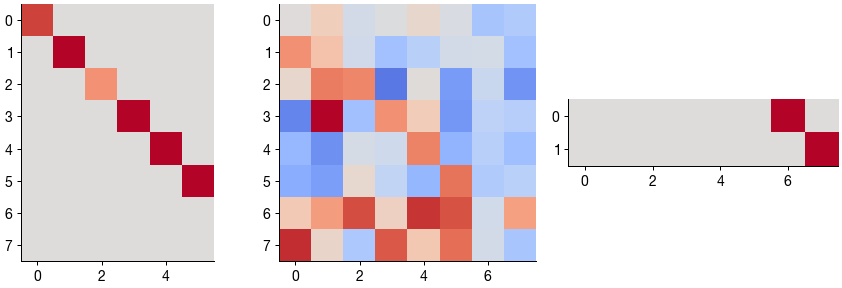

0.0116138_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500
0.8945658841811862 0.9398561806261074


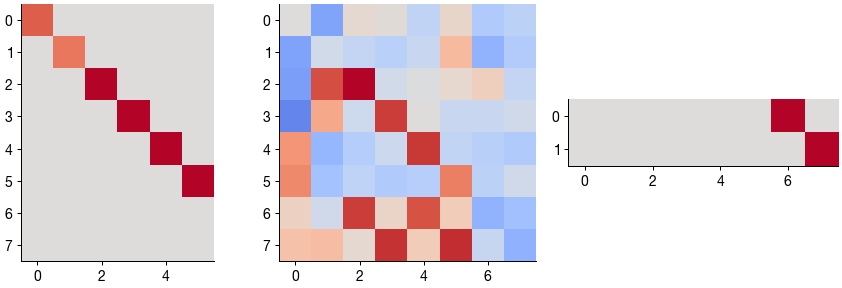

In [160]:
qs = []
Us = []
for sf in filtered_LC_folders:
    path_to_subfolder = os.path.join(path_to_folders, sf)
    LC_folders = os.listdir(path_to_subfolder)
#     print(path_to_subfolder)
    if ".DS_Store" in LC_folders:
        LC_folders.remove(".DS_Store")
    scores1 = [float(LC_folder.split("_")[0]) for LC_folder in LC_folders]
    scores2 = [float(LC_folder.split("_")[1]) for LC_folder in LC_folders]
    pdf = pd.DataFrame({"R2 total" : scores1, "R2 projection" : scores2, "LC_folder_name" : LC_folders})
    pdf = pdf.sort_values(by=['R2 total'], ascending=False)
    folders_sorted = list(pdf["LC_folder_name"])
    scores1_sorted = list(pdf["R2 total"])
    scores2_sorted = list(pdf["R2 projection"])
    
    # get the average result across 5 top LCs!
    W_inp = np.zeros((8,6))
    W_rec = np.zeros((8,8))
    W_out = np.zeros((2,8))
    num_nets = 7
    for i in range(num_nets):
        data_file = os.path.join(path_to_subfolder, folders_sorted[i], f"{scores1_sorted[i]}_{scores2_sorted[i]}_LC_params.json")
        data = json.load(open(data_file, "rb+"))
        W_inp += np.array(data["W_inp"])
        W_rec += np.array(data["W_rec"])
        W_out += np.array(data["W_out"])
    W_inp/=num_nets
    W_rec/=num_nets
    W_out/=num_nets
    print(sf)
    print(scores1_sorted[0], scores2_sorted[0])
    
    fig, axs = plt.subplots(1, 3, figsize = (6,2))
    axs[0].imshow(W_inp, cmap = 'coolwarm', vmin=-1, vmax = 1)
    axs[1].imshow(W_rec, cmap = 'coolwarm', vmin=-1, vmax = 1)
    axs[2].imshow(W_out, cmap = 'coolwarm', vmin=-1, vmax = 1)
    plt.show()

Thus, there are some weird networks, but it seems there is one patterned solution in 4 out of 6 consistent networks

TODO: need to get more statistics

Also, what is the matter with the rest of the networks which do not fit the pattern?

for those undestandable latent circuits can you see the structure in the large network in the first place?

In [136]:
nets_to_study = ["0.0116865_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500",
                "0.0113801_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500",
                "0.0113312_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500",
                "0.0116138_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500"]

In [137]:
w_recs = []
w_outs = []
w_inps = []
W_recs = []
W_outs = []
W_inps = []
Qs = []
for sf in nets_to_study:
    path_to_subfolder = os.path.join(path_to_folders, sf)
    LC_folders = os.listdir(path_to_subfolder)
#     print(path_to_subfolder)
    if ".DS_Store" in LC_folders:
        LC_folders.remove(".DS_Store")
    scores1 = [float(LC_folder.split("_")[0]) for LC_folder in LC_folders]
    scores2 = [float(LC_folder.split("_")[1]) for LC_folder in LC_folders]
    pdf = pd.DataFrame({"R2 total" : scores1, "R2 projection" : scores2, "LC_folder_name" : LC_folders})
    pdf = pdf.sort_values(by=['R2 total'], ascending=False)
    folders_sorted = list(pdf["LC_folder_name"])
    scores1_sorted = list(pdf["R2 total"])
    scores2_sorted = list(pdf["R2 projection"])

    data_file = os.path.join(path_to_subfolder, folders_sorted[0], f"{scores1_sorted[0]}_{scores2_sorted[0]}_LC_params.json")
    data = json.load(open(data_file, "rb+"))
    w_inp = np.array(data["W_inp"])
    w_rec = np.array(data["W_rec"])
    w_out = np.array(data["W_out"])
    U = np.array(data["U"])
    q = np.array(data["q"])
    Q = U.T @ q
    w_inps.append(deepcopy(W_inp))
    w_recs.append(deepcopy(W_rec))
    w_outs.append(deepcopy(W_out))
    Qs.append(deepcopy(Q))
    rnn_score = float(sf.split("_")[0])
    
    rnn_config_file = os.path.join(path_to_subfolder, folders_sorted[0], f"{rnn_score}_params_CDDM.json")
    
    data_RNN = json.load(open(rnn_config_file, "rb+"))
    W_inp = np.array(data_RNN["W_inp"])
    W_rec = np.array(data_RNN["W_rec"])
    W_out = np.array(data_RNN["W_out"])
    W_inps.append(deepcopy(W_inp))
    W_recs.append(deepcopy(W_rec))
    W_outs.append(deepcopy(W_out))

/var/folders/xg/zhs696691j905z_h1c8w8wvh0000gp/T/ipykernel_67822/2146366435.py:9: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace = 0, hspace = 0)


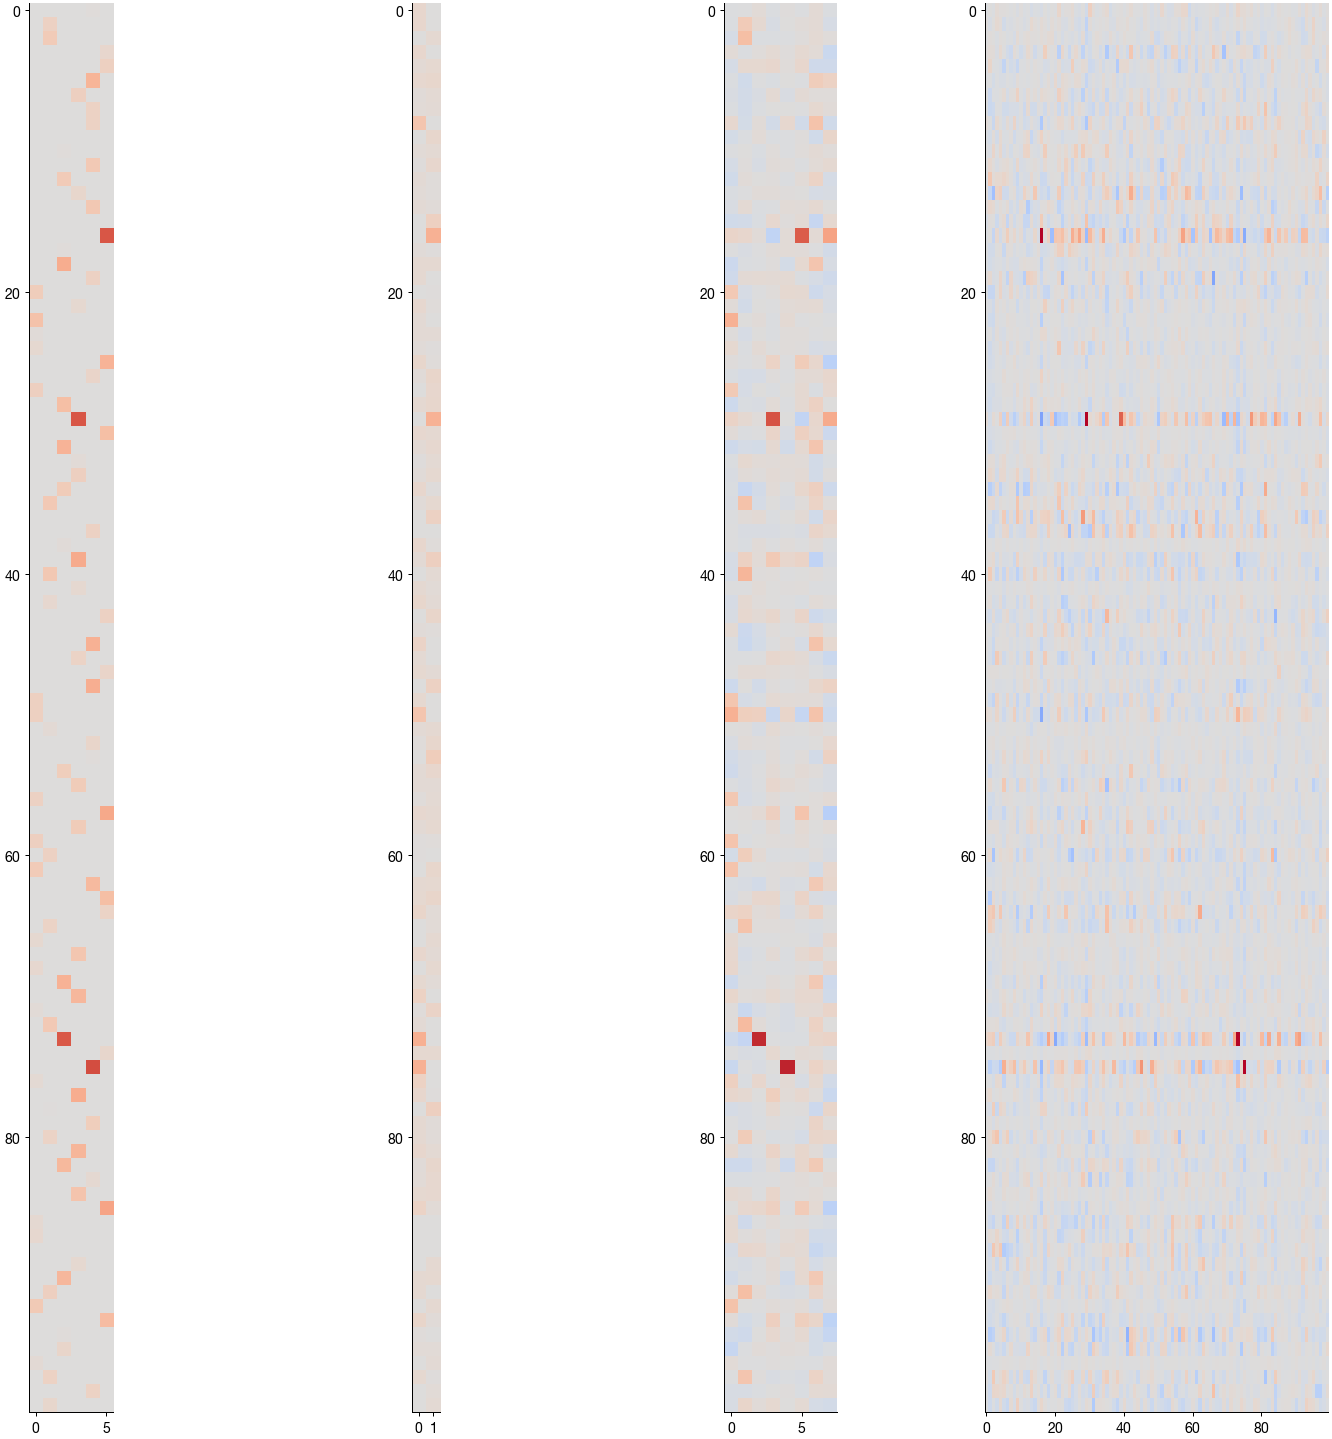

In [157]:
j = 0
fig, axs = plt.subplots(1, 4, figsize = (10,10))
axs[0].imshow(W_inps[j], cmap = 'coolwarm', vmin=-1, vmax = 1)
axs[1].imshow(W_outs[j].T, cmap = 'coolwarm', vmin=-1, vmax = 1)
axs[2].imshow(Qs[j], cmap = 'coolwarm', vmin=-1, vmax = 1)
axs[3].imshow(W_recs[j], cmap = 'coolwarm', vmin=-0.5, vmax = 0.5)
axs[3].set_aspect(4.1, adjustable='box')
plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()

In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(W_inps[j])

PCA(n_components=3)

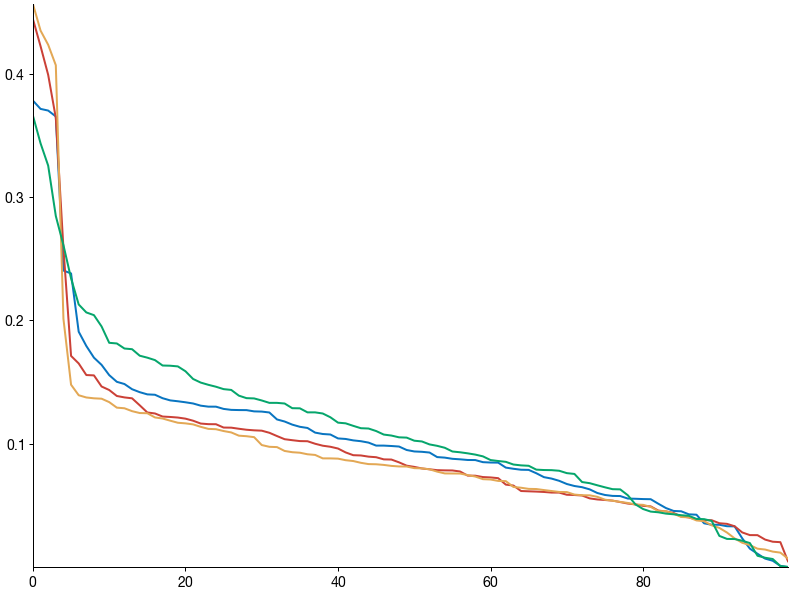

In [168]:
plt.plot(np.sort(np.sum(W_outs[0], axis = 0))[::-1])
plt.plot(np.sort(np.sum(W_outs[1], axis = 0))[::-1])
plt.plot(np.sort(np.sum(W_outs[2], axis = 0))[::-1])
plt.plot(np.sort(np.sum(W_outs[3], axis = 0))[::-1])

# the inputs are not uniform!

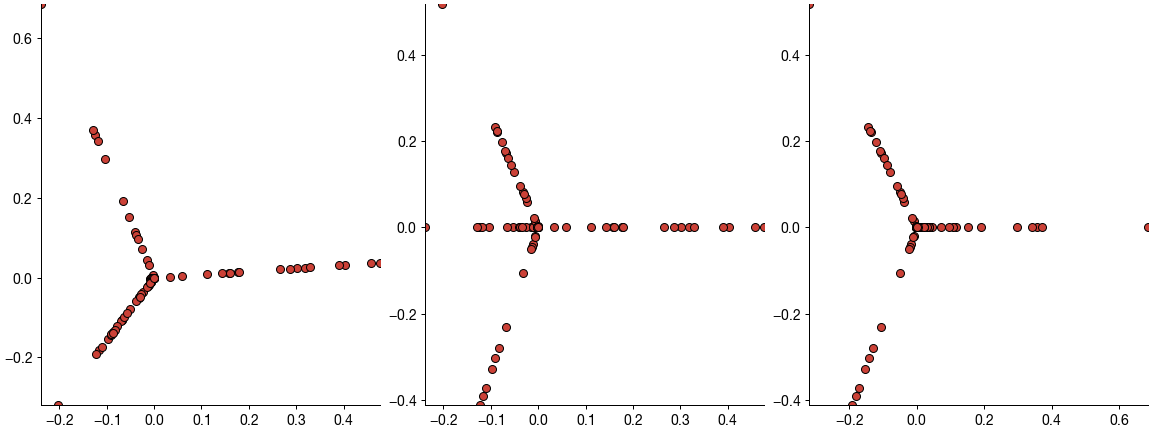

In [141]:
mat = W_inps[j]@ pca.components_.T
fig, axs = plt.subplots(1, 3, figsize = (8,3))
axs[0].scatter(mat[:, 0], mat[:, 1], color = 'r', edgecolor = 'k')
axs[1].scatter(mat[:, 0], mat[:, 2], color = 'r', edgecolor = 'k')
axs[2].scatter(mat[:, 1], mat[:, 2], color = 'r', edgecolor = 'k')
plt.show()

# need to check the clustering of the original traces of the RNN

TODO (need to save trajectories as a separate file! I don't want to rerun it constantly)

In [153]:
sys.path.insert(0, "../")
sys.path.insert(0, "../../")
sys.path.insert(0, "../../../")
from rnn_coach.src import RNN_numpy
from rnn_coach.src.Task import TaskCDDM

In [150]:
os.listdir(rnn_folder)
rnn_folder = os.path.join(path_to_RNNs, nets_to_study[0])

['0.0116865_psychometric_data.png',
 '0.0116865_psycho_data.json',
 '0.0116865_train&valid_loss.png',
 '0.0116865_LA_3D.png',
 '0.0116865_LA_data.pkl',
 '0.0116865_config.json',
 '0.0116865_random_trials.png',
 '0.0116865_LA_RHS.png',
 '0.0116865_fp_data.json',
 '0.0116865_params_CDDM.json']

In [ ]:
RNN_valid = RNN_numpy(N=best_net_params["N"],
                      dt=best_net_params["dt"],
                      tau=best_net_params["tau"],
                      activation=numpify(activation),
                      W_inp=best_net_params["W_inp"],
                      W_rec=best_net_params["W_rec"],
                      W_out=best_net_params["W_out"],
                      y_init=best_net_params["y_init"])